In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#I always start importing some important librarys, just in case

In [2]:
data= pd.read_csv(r"C:\Users\quint\Music\Limbo\Databse\obesidade\archive\housing.csv")

In [3]:
data
#Always check you data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data[data.isnull().any(axis=1)]
#Checking if there is any null data so i can eliminate the data, so it doenst interfer in the future

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
data=data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

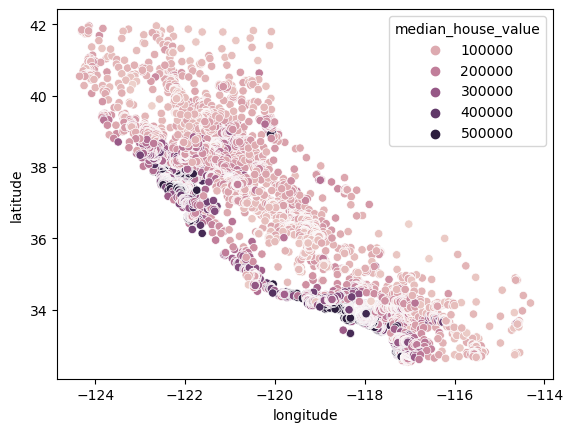

In [7]:
sns.scatterplot(data=data, x=data['longitude'], y=data['latitude'], hue=data["median_house_value"])

#Coll way to see of the prices work based on the part of the city, its clear that the proximity to the beach
# its the most important factor in the prices. At the sime time we see that latitude and longitute need each other
# for they data to make any sense.


In [8]:
data.corr()["median_house_value"]

#I use this to help me decide what columns in gonna use

longitude            -0.045398
latitude             -0.144638
housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [9]:
california_data = data[["housing_median_age","total_rooms","total_bedrooms","median_income","households","median_house_value"]]
california_data.tail()

#Now we have what will be used

,housing_median_age,total_rooms,total_bedrooms,median_income,households,median_house_value
20635,25.0,1665.0,374.0,1.5603,330.0,78100.0
20636,18.0,697.0,150.0,2.5568,114.0,77100.0
20637,17.0,2254.0,485.0,1.7000,433.0,92300.0
20638,18.0,1860.0,409.0,1.8672,349.0,84700.0
20639,16.0,2785.0,616.0,2.3886,530.0,89400.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
california_train_data= california_data.drop('median_house_value',axis=1).values
x_train,x_test,y_train,y_test = train_test_split(california_train_data,california_data["median_house_value"],test_size=0.3, random_state=40)

#This way i reserve 30% to test and 70% to train.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler= MinMaxScaler()
scaler.fit(x_train)
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

#Preparing the data to be trained

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [15]:
x_train.shape

(14303, 5)

In [16]:
model= Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")

#Creating the dense layers

In [17]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=157,
          validation_data=(x_test, y_test), verbose=1
          )

#Trining the model, the epochs number i try one i think is high so i can perfect it later

Epoch 1/157
447/447 [==============================] - 2s 3ms/step - loss: 56136052736.0000 - val_loss: 55903182848.0000
Epoch 2/157
447/447 [==============================] - 2s 4ms/step - loss: 55741628416.0000 - val_loss: 55134498816.0000
Epoch 3/157
447/447 [==============================] - 1s 2ms/step - loss: 54458953728.0000 - val_loss: 53307404288.0000
Epoch 4/157
447/447 [==============================] - 1s 2ms/step - loss: 52008722432.0000 - val_loss: 50262892544.0000
Epoch 5/157
447/447 [==============================] - 1s 3ms/step - loss: 48341090304.0000 - val_loss: 46053257216.0000
Epoch 6/157
447/447 [==============================] - 1s 3ms/step - loss: 43610382336.0000 - val_loss: 40917549056.0000
Epoch 7/157
447/447 [==============================] - 2s 4ms/step - loss: 38113615872.0000 - val_loss: 35201462272.0000
Epoch 8/157
447/447 [==============================] - 2s 4ms/step - loss: 32255756288.0000 - val_loss: 29344329728.0000
Epoch 9/157
447/447 [===========

<AxesSubplot:>

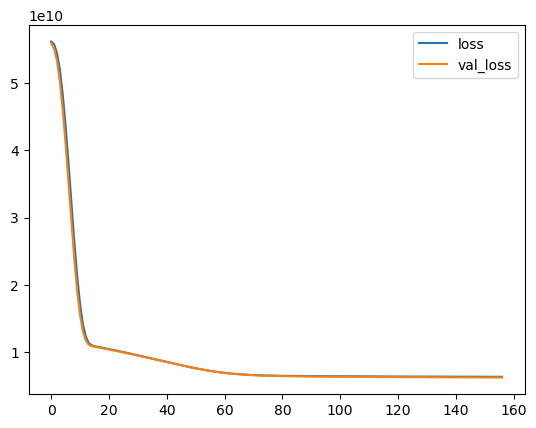

In [18]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
#overfitting :)
#This means i used to many epochs, what can be a problem

In [19]:
model= Sequential()
model.add(Dense(units=30, activation='linear'))
model.add(Dense(units=20, activation='linear'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(x=x_train, 
          y=y_train, 
          epochs=103,
          validation_data=(x_test, y_test), verbose=1
          )
#Instead of just changing the epochs, i decided to create a new traing, and show my first mistake while correcting it.

Epoch 1/103
447/447 [==============================] - 3s 4ms/step - loss: 56068857856.0000 - val_loss: 55642361856.0000
Epoch 2/103
447/447 [==============================] - 2s 4ms/step - loss: 54814396416.0000 - val_loss: 53245693952.0000
Epoch 3/103
447/447 [==============================] - 2s 4ms/step - loss: 50915610624.0000 - val_loss: 47833194496.0000
Epoch 4/103
447/447 [==============================] - 2s 4ms/step - loss: 44019998720.0000 - val_loss: 39710502912.0000
Epoch 5/103
447/447 [==============================] - 2s 4ms/step - loss: 35052875776.0000 - val_loss: 30338258944.0000
Epoch 6/103
447/447 [==============================] - 1s 3ms/step - loss: 25836697600.0000 - val_loss: 21694601216.0000
Epoch 7/103
447/447 [==============================] - 1s 2ms/step - loss: 18336604160.0000 - val_loss: 15550979072.0000
Epoch 8/103
447/447 [==============================] - 1s 2ms/step - loss: 13672087552.0000 - val_loss: 12311394304.0000
Epoch 9/103
447/447 [===========

<AxesSubplot:>

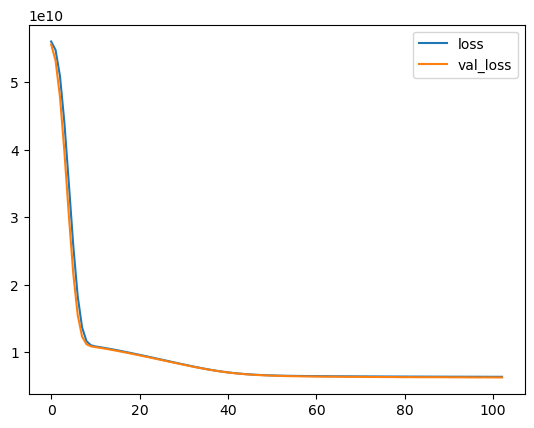

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
# This time looks better

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = model.predict(x_test)
mse =mean_squared_error(y_test, predictions,squared= False)
mae = mean_absolute_error(y_test, predictions)
media= data["median_house_value"].mean()

print(f"Average house value {media}, mean absolute error = {mae}, mean squared error = {mse}")

#I looked over the average house value so i could  have a better ideia of the erros.
# The errors are high, more than 25%, what doenst suprise me seing the low corr, and the fact that longitute and latitude
# werent on the final dataset (and they just work together). I think other machine learning methods would be better
# but right now i want to learn more about linear regression.

192/192 [==============================] - 0s 1ms/step
Average house value 206864.41315519012, mean absolute error = 58505.75352183804, mean squared error = 79097.23281518489


In [23]:
model.evaluate(x_test, y_test)

#Like i said, the evaluate doenst look good, i saw way better results in the internet, but they use other methods
# of machine learning

192/192 [==============================] - 0s 1ms/step - loss: 6256373248.0000


6256373248.0

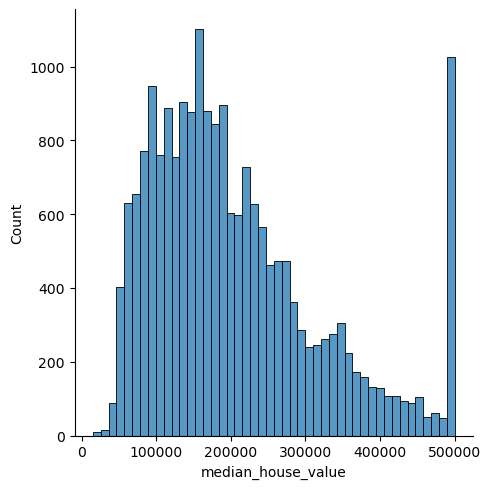

In [37]:
sns.displot(california_data["median_house_value"])

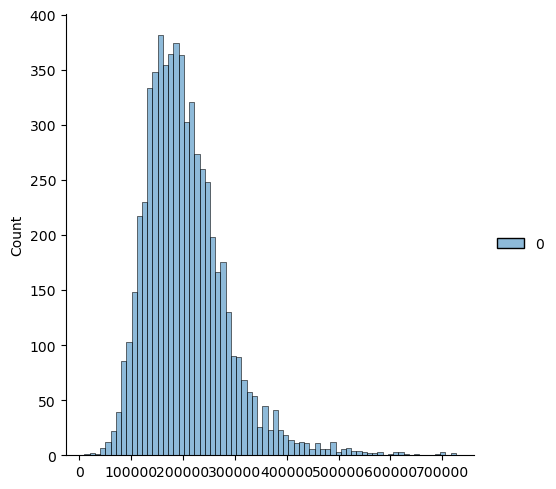

In [30]:
sns.displot(predictions)

# I did this graphs so its easy to see the diferences of the predictions and the real value, because
# 50,000 have a big frequency but its far for the most commons results, it mess a lot if the prediction.
# This is explained because there is a lot of cheap houses for medium class, and a lot of houses for rich people, but
# there is very few people in the middle term of this two, so it create this.

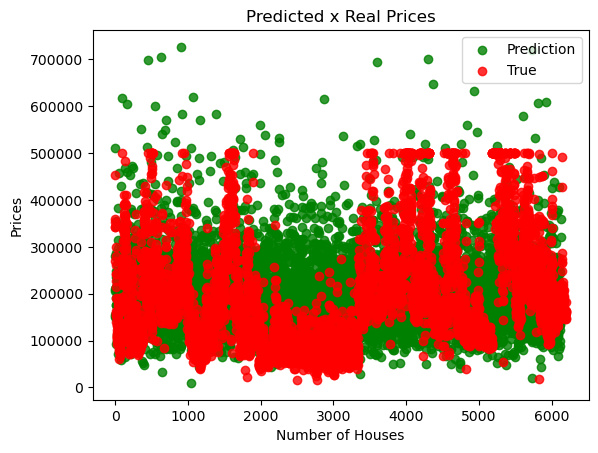

In [58]:
real_values = california_data["median_house_value"][:6200]

plt.scatter(range(len(predictions)), predictions, label='Prediction', color='green',alpha=0.8)
plt.scatter(range(len(real_values)), real_values, label='True', color='red',alpha=0.8)

plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Prices')
plt.title('Predicted x Real Prices')
plt.show()

# A simple way of seeing the diference of the true valor if what the system predicted

In [45]:
y_pred.shape

#I used this to see the shape that would be used of the real values.

(6130, 1)

In [ ]:
#I know it wanst perfect but i still proud of the system that i did.
# Any comentarys and sugesttion on how i could improve are welcomed. 